In [2]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
df=load_digits()

In [4]:
print(df)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [8]:
# Printing the matrix of data
print(df.data)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [9]:
# Printing the targeted columns
print(df.target)



[0 1 2 ... 8 9 8]


In [10]:
# printing the shape of data
print(df.data.shape)


(1797, 64)


In [11]:
# Printing the shape of the image
print(df.images.shape)



(1797, 8, 8)


In [12]:
# Printing the length of data
dataimageLength = len(df.images)
print(dataimageLength)

1797


<Figure size 640x480 with 0 Axes>

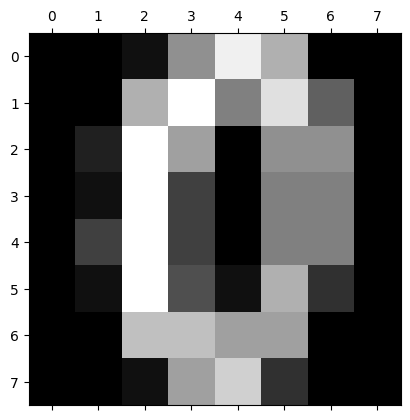

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [13]:
# Vizulizing the data
n=10 # Number of samples out of the total dataset
plt.gray()
plt.matshow(df.images[n])
plt.show()
df.images[n]

**Marking the dependent and Independent variables**

In [15]:
# Reshaping the pixels
X=df.images.reshape((dataimageLength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
Y=df.target
Y

array([0, 1, 2, ..., 8, 9, 8])

Importing the models and dividing the dataset into training and testing the data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)
print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


In [19]:
# Trainning the data
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

[0]




/tmp/ipykernel_33/2132338196.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


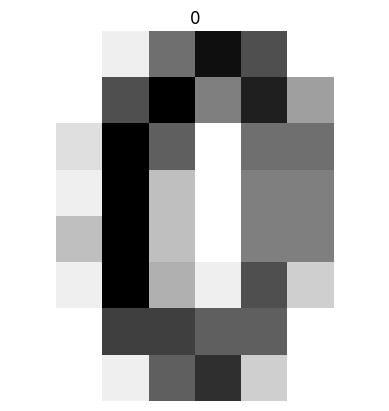

In [20]:
# Testing the data
n1=14
result=model.predict(df.images[n].reshape((1,-1)))
plt.imshow(df.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

In [21]:
# prediction for the test data
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 ...
 [6 6]
 [2 2]
 [9 9]]


In [22]:
# Calculating the accuracy oof the model
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 97.4074074074074%


Trying different svm models

In [23]:
from sklearn import svm
model1=svm.SVC(kernel='linear')
model1.fit(X_train,y_train)
y_predModel1=model1.predict(X_test)
print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))

Accuracy of the Model 1: 97.4074074074074%


In [25]:
model2=svm.SVC(kernel='rbf')
model2.fit(X_train,y_train)
y_predModel2=model2.predict(X_test)
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))

Accuracy of the Model 2: 99.07407407407408%


In [27]:
model3=svm.SVC(gamma=0.001)
model3.fit(X_train,y_train)
y_predModel3=model.predict(X_test)
print("Accuray of Model 3: {0}%".format(accuracy_score(y_test ,y_predModel3)*100))

Accuray of Model 3: 97.4074074074074%


In [29]:
model4=svm.SVC(gamma=0.001,C=0.1)
model.fit(X_train, y_train)
y_predModel4=model.predict(X_test)
print("Accuracy of Model 4 : {0}%".format(accuracy_score(y_test,y_predModel4)*100))

Accuracy of Model 4 : 97.4074074074074%
